In [1]:
import logging
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pykeen
from pykeen.kge_models import TransE

In [2]:
%matplotlib inline

In [3]:
logging.basicConfig(level=logging.INFO)
logging.getLogger('pykeen').setLevel(logging.INFO)

In [4]:
print(sys.version)

3.7.1 (default, Nov  6 2018, 18:45:35) 
[Clang 10.0.0 (clang-1000.11.45.5)]


In [5]:
print(time.asctime())

Tue Apr  2 16:09:12 2019


In [6]:
print(pykeen.get_version())

0.0.22


Check which hyper-parameters are required by TransE:

In [7]:
TransE.hyper_params

['embedding_dim',
 'margin_loss',
 'learning_rate',
 'scoring_function',
 'normalization_of_entities']

Define output directory:

In [8]:
output_directory = os.path.join(
    os.path.expanduser('~'), 
    'Desktop', 
    'pykeen_test'
)

Define hyper-parameters inclduing the evaluation information:
 * Define the hyper-parameter optimization mode: **HPO_mode**
 * Define for each hyper-parameter a list of values (single valued lists are possible)
 * Define the number of hyper-parameter optimization iterations: **maximum_number_of_hpo_iters**
 * Define the path to the test set (**test_set_path**) or define the ratio of the training set that should be used as test set (**test_set_ratio**)
 * Define whether you want to compute the metrics (mean rank and hits@k) in raw or in a filtered setting: **filter_negative_triples**

In [11]:
config = dict(
    training_set_path           = '../../data/rdf.nt',
    test_set_path               = '../../data/rdf.nt', # Just for illustration, we use the training set also as test set
    execution_mode              = 'HPO_mode', # Define hyper-parameter optimization mode
    random_seed                 = 0,
    kg_embedding_model_name     = 'TransE',
    embedding_dim               = [10,20,50,100],
    scoring_function            = [1,2],  
    normalization_of_entities   = [2],  # corresponds to L2
    margin_loss                 = [1,2,3,4,5,6,7,8,9,10],
    learning_rate               = [0.1,0.01,0.001],
    num_epochs                  = [50,100],  
    batch_size                  = [32],
    filter_negative_triples     = True,
    maximum_number_of_hpo_iters = 50, # Define the number HPO iterations
    preferred_device            = 'cpu'
)

Train and evaluate TransE:

In [12]:
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

HPO Iteration:   0%|          | 0/50 [00:00<?, ?it/s]/Users/mehdi/virtual_envs/pykeen_python_3_7/lib/python3.7/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))

Training epoch:  98%|█████████▊| 98/100 [00:00<00:00, 136.33it/s]
                                                                 INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.09s seconds
Training epoch:  94%|█████████▍| 47/50 [00:00<00:00, 155.06it/s]
                                                                INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.09s seconds
Training epoch:  94%|█████████▍| 47/50 [00:00<00:00, 114.85it/s]
                                                                INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.14s seconds
Training epoch:  88%|████████▊ | 44/50 [

Training epoch:  86%|████████▌ | 43/50 [00:00<00:00, 139.78it/s]
                                                                INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.08s seconds
Training epoch:  96%|█████████▌| 48/50 [00:00<00:00, 154.29it/s]
                                                                INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.09s seconds
Training epoch:  93%|█████████▎| 93/100 [00:00<00:00, 155.33it/s]
                                                                 INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.08s seconds
Training epoch:  95%|█████████▌| 95/100 [00:00<00:00, 159.11it/s]
                                                                 INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.08s seconds
Training epoch:  97%|█████████▋| 97/100 [00:00<00:00, 160.41it/s]
                                                      

                                                                 INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.09s seconds
Training epoch:  88%|████████▊ | 44/50 [00:00<00:00, 142.04it/s]
                                                                INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.08s seconds
Training epoch:  76%|███████▌  | 38/50 [00:00<00:00, 186.06it/s]
                                                                INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.08s seconds
Training epoch:  96%|█████████▌| 48/50 [00:00<00:00, 155.48it/s]
                                                                INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.10s seconds
Training epoch:  88%|████████▊ | 88/100 [00:00<00:00, 143.21it/s]
                                                                 INFO:pykeen.utilities.evaluation_utils.metrics_computatio

Training epoch:  72%|███████▏  | 36/50 [00:00<00:00, 174.52it/s]
                                                                INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.08s seconds
Training epoch:  91%|█████████ | 91/100 [00:00<00:00, 177.19it/s]
                                                                 INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.08s seconds
Training epoch:  78%|███████▊  | 39/50 [00:00<00:00, 190.20it/s]
                                                                INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.07s seconds
Training epoch:  87%|████████▋ | 87/100 [00:00<00:00, 170.24it/s]
                                                                 INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.08s seconds
Training epoch:  85%|████████▌ | 85/100 [00:00<00:00, 163.50it/s]
                                                      

Check result entries:

In [14]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'entity_to_embedding', 'relation_to_embedding', 'eval_summary', 'entity_to_id', 'relation_to_id', 'final_configuration'])

Get the model configuration that lead to best results:

In [15]:
results.results['final_configuration']

{'training_set_path': '../../data/rdf.nt',
 'test_set_path': '../../data/rdf.nt',
 'execution_mode': 'HPO_mode',
 'random_seed': 0,
 'kg_embedding_model_name': 'TransE',
 'embedding_dim': 50,
 'scoring_function': 1,
 'normalization_of_entities': 2,
 'margin_loss': 10,
 'learning_rate': 0.1,
 'num_epochs': 50,
 'batch_size': 32,
 'filter_negative_triples': True,
 'maximum_number_of_hpo_iters': 50,
 'preferred_device': 'cpu',
 'num_entities': 89,
 'num_relations': 24}

Access trained model:

In [16]:
results.results['trained_model']

TransE(
  (criterion): MarginRankingLoss()
  (entity_embeddings): Embedding(89, 50)
  (relation_embeddings): Embedding(24, 50)
)

Visualize loss values:

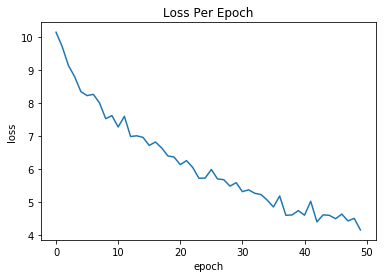

In [17]:
losses = results.results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

Get evaluation results:
 * Mean rank
 * Hits@k, k $\in$ {1,3,5,10} 

In [18]:
results.results['eval_summary']

{'mean_rank': 1.7830188679245282,
 'hits@k': {1: 0.7216981132075472,
  3: 0.8301886792452831,
  5: 0.8726415094339622,
  10: 0.9198113207547169}}